# Debug the real spectra

So it doesn't work well with real data, so having taken out one example of real data, the sequence is 

Hybrid: 
```
DLQTLALWSRM
```

Non hybrid:
```
DLTEYLSRFGEVV
```

so toy with the tool until we find out whats wrong

## Load params and run

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src import runner
    

In [2]:
specPath = '/Users/zacharymcgrath/Desktop/nod2 data/single/'
fastaPath = '/Users/zacharymcgrath/Desktop/nod2 data/filteredNOD2.fasta'
outputDir = '/Users/zacharymcgrath/Desktop/Experiment output/singleReal/'
minPep = 3
maxPep = 14
tolerance = 20
verbose = True
scoringAlg = 'ibb'

In [3]:
params = {
    'spectra_folder': specPath,
    'database_file': fastaPath,
    'output_dir': outputDir,
    'min_peptide_len': minPep,
    'max_peptide_len': maxPep,
    'tolerance': tolerance,
    'verbose': verbose, 
    'scoring_alg': scoringAlg
}

In [4]:
runner.run(params)

Loading database...
Adding protein 279/279 to tree
Done.
Building hashes for kmers...
Indexing database for k=14...
101665 unique kmers
Done
Looking at kmer 101665/101665
Done.
Analyzing spectra file 1/1[0%]

[1.5, 1, 1.5, 1.5, 1.5, 3.0, 2.5, 1.5, 2.5, 1.5, 1.5, 1.5, 1.5, 2.5, 1.5, 1, 1, 1.5, 1, 2.5, 5.5, 1, 1, 7.5, 1.0, 1, 1.5, 1, 1, 2.5, 3.0, 1, 1, 2.5, 1.5, 1, 1.0, 1, 1.5, 1.5, 5.5, 1.0, 2.5, 1.5, 1.5, 1, 1.5, 5.5, 1.5, 2.5, 1.5, 1.5, 1.5, 2.5, 1.5, 1.5, 1, 1, 3.0, 1.5, 1, 1, 1, 1, 1, 1.5, 1, 1.5, 1, 1, 1, 1.5, 1.5, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.5, 1, 1, 1.0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.5, 1, 1, 1, 1, 7.5, 1, 3, 1, 1, 1, 1.5, 1, 1, 1.5, 1, 1, 1, 1.5, 1, 1, 1, 1, 1, 1.5, 1, 1, 1, 1, 1, 1.5, 1, 3, 1, 1.5, 1, 1.5, 1, 1, 1.5, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3.0, 1.5, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.5, 1, 1, 3.0, 1.5, 1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

## Load and read results

In [5]:
import pandas as pd

outputFile = '/Users/zacharymcgrath/Desktop/Experiment output/singleReal/summary.tsv'
hybridOutputFile = '/Users/zacharymcgrath/Desktop/Experiment output/singleReal/hybrid_summary.tsv'

In [6]:
df = pd.read_csv(outputFile, sep='\t')
hdf = pd.read_csv(hybridOutputFile, sep='\t')

In [7]:
hdf.head(2)

,Unnamed: 0,left_proteins,right_proteins,sequence,hybrid_sequence,b_score,y_score,total_score,precursor_distance,entry name
0,0,"['INS2_MOUSE Insulin-2', 'INS1_MOUSE Insulin-1']","['CMGA_MOUSE Chromogranin-A', 'ANKS6_MOUSE Ank...",DLQTLALWSRM,DLQTLAL-WSRM,40,80,4.2,0.350280,/Users/zacharymcgrath/Desktop/nod2 data/single...
1,1,"['1433E_MOUSE 14-3-3 protein epsilon', '1433S_...",['HNRDL_MOUSE Heterogeneous nuclear ribonucleo...,VETEYLSRFGEVV,VETE-YLSRFGEVV,41,58,3.6,0.388109,/Users/zacharymcgrath/Desktop/nod2 data/single...


In [8]:
df.head(1)

,Unnamed: 0


In [8]:
import json

s = json.load(open('/Users/zacharymcgrath/Desktop/Experiment output/singleReal/summary.json', 'r'))

In [9]:
for k, v in s.items():
    for a in v['alignments']:
        print(a['sequence'])


DLQTLALWSRM
DLQTLALWSRM
DLQTLALWFLD
VETEYLSRFGEVV
VTEEYLSRFGEVV
VETEYLSRFGEVV


In [ ]:
from src.spectra.gen_spectra import gen_spectrum

print(gen_spectrum('DLQTLAWSRM'))

In [ ]:
from pyteomics import mzml
for x in mzml.read('/Users/zacharymcgrath/Desktop/nod2 data/single/singleRealSpectrum.mzml'):
    print(x)

In [ ]:
667.35008 - 610.8082

In [ ]:
57.021464 / 2

In [5]:
score_list = [[1.5, 1, 1.5, 1.5, 1.5, 3.0, 2.5, 1.5, 2.5, 1.5, 1.5, 1.5, 1.5, 2.5, 1.5, 1, 1, 1.5, 1, 2.5, 5.5, 1, 1, 7.5, 1.0, 1, 1.5, 1, 1, 2.5, 3.0, 1, 1, 2.5, 1.5, 1, 1.0, 1, 1.5, 1.5, 5.5, 1.0, 2.5, 1.5, 1.5, 1, 1.5, 5.5, 1.5, 2.5, 1.5, 1.5, 1.5, 2.5, 1.5, 1.5, 1, 1, 3.0, 1.5, 1, 1, 1, 1, 1, 1.5, 1, 1.5, 1, 1, 1, 1.5, 1.5, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.5, 1, 1, 1.0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.5, 1, 1, 1, 1, 7.5, 1, 3, 1, 1, 1, 1.5, 1, 1, 1.5, 1, 1, 1, 1.5, 1, 1, 1, 1, 1, 1.5, 1, 1, 1, 1, 1, 1.5, 1, 3, 1, 1.5, 1, 1.5, 1, 1, 1.5, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3.0, 1.5, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.5, 1, 1, 3.0, 1.5, 1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
[1.0, 6, 1.5, 1.5, 1.5, 3.0, 1.5, 1, 1.0, 1.5, 2.5, 1.5, 1, 1, 1.5, 1, 1, 2.5, 1, 1, 3.0, 1.5, 1, 2.5, 1.5, 1.0, 1.5, 1, 1.5, 1.5, 1, 4.5, 1, 4.5, 1.5, 1.5, 1, 1, 1, 1.5, 1, 1, 1.5, 1, 1, 3, 1, 3.0, 1, 1, 1.5, 1.5, 1.5, 1.5, 1, 3, 4.0, 1, 1, 1, 1.5, 1, 1.0, 1.0, 1, 1, 1, 1, 1, 1, 1.5, 1.5, 3, 3, 1, 1, 1.5, 1, 1.5, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1.5, 1, 1, 1, 1, 1, 10, 1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.5, 1, 1, 1, 1, 1, 1, 1, 1.5, 1.5, 1, 1, 1, 1, 1, 1, 1, 1.5, 1, 1, 1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.5, 1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.5, 1, 1, 1.5, 1, 1.5, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
[3, 1.5, 1.5, 1, 1, 1, 1.5, 3.0, 1.5, 1.5, 2.5, 1, 1, 1, 1, 1, 1.0, 3.0, 1, 1.5, 3.0, 1.5, 1.5, 1, 1.0, 3.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1, 1, 3, 1, 1.5, 1, 1, 1.5, 1, 1, 1.5, 1, 3, 1, 1, 1, 1, 1, 1, 1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.5, 1.5, 1.5, 1.5, 1, 1, 1, 3, 1.5, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
[1.5, 1, 1.5, 1.0, 1.5, 1, 1.5, 1, 1, 1, 1, 1, 1, 1.5, 1, 1, 1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.0, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.5, 1.5, 1, 3.0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.5, 1, 1, 1, 1.5, 1, 1, 1, 1, 1.5, 1.5, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


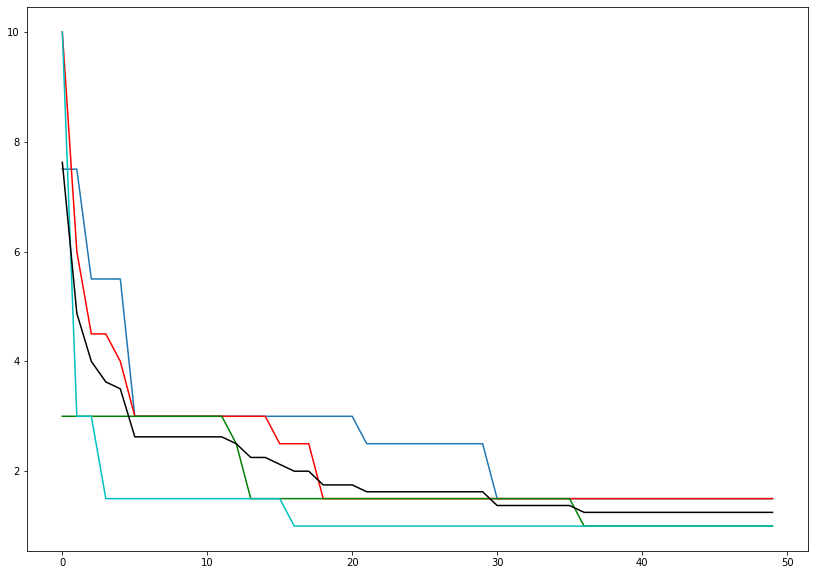

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 10))

for i, l in enumerate(score_list):
    score_list[i] = sorted(l, reverse=True)

plt.plot(score_list[0][:50])
plt.plot(score_list[1][:50], 'r')
plt.plot(score_list[2][:50], 'g')
plt.plot(score_list[3][:50], 'c')

maxlen = max(map(len, score_list))
for i in range(4):
    score_list[i] += [0 for _ in range(maxlen - len(score_list[i]))]
    
a = np.mean(score_list, axis=0)
plt.plot(a[:50], 'k')

[ 4.48942512e+01 -2.75713389e-01  5.88926194e-04 -4.23539329e-07]


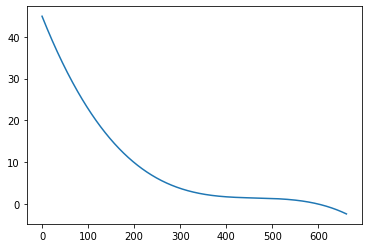

In [32]:
import numpy.polynomial.polynomial as poly

coefs = poly.polyfit([i for i in range(len(a))], a, 3)
print(coefs)
ffit = poly.Polynomial(coefs)    # instead of np.poly1d
plt.plot(
    np.linspace(0, len(a), num=len(a)), 
    ffit(np.linspace(0, len(a), num=len(a)))
)